In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [127]:
df = pd.DataFrame({
    'a':np.append(np.random.normal(0,1, 1000),np.random.normal(2,1, 1000)),
    'b':[0] * 1000 + [1] * 1000
})

df = df[(df['a'] > -1) & (df['a'] < 3)]

In [128]:
df

,a,b
0,-0.345751,0
1,1.002937,0
3,0.559296,0
4,-0.713429,0
5,-0.839322,0
...,...,...
1992,1.746829,1
1993,2.227420,1
1997,0.819749,1
1998,1.543499,1


In [171]:
gaussians = {i:np.random.normal(0,1 + 0.1 * i, 1000) for i in range(10)}

In [244]:
data_col = np.concatenate([np.random.normal(0,1 + 0.1 * i, 1000) for i in range(10)])
label_col = np.array([ i for i in range(10) for _ in range(1000)])

gaussians_df = pd.DataFrame({'A':data_col, 'L':label_col})

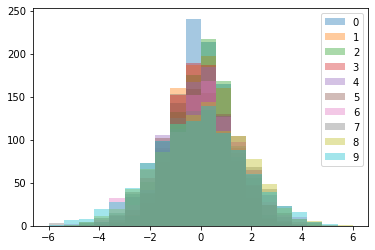

In [246]:
# plt.hist(gaussians.values())
bin_edges = np.linspace(-6,6,21)
for i, arr in gaussians.items():
    plt.hist(arr, alpha=0.4, label=f'{i}', bins=bin_edges)
plt.legend()
# plt.show()

L
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
Name: A, dtype: object

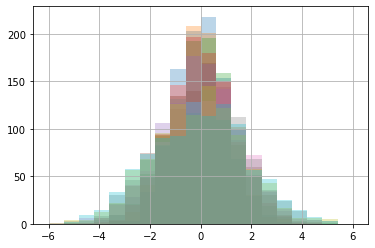

In [249]:
bin_edges = np.linspace(-6,6,21)
gaussians_df.groupby('L')['A'].hist(bins=bin_edges, alpha=0.3)

In [155]:
# nX_train, nX_test, ny_train, ny_test = train_test_split(df[['a']], df['b'], test_size=0.2, shuffle=True)

In [270]:
#  here i need to unfold a cell
scores=[]
log_likelihoods = {}
for i in range(10):
    X = gaussians_df[(gaussians_df['L'] == i) | (gaussians_df['L'] == 0)]
    nX_train, nX_test, ny_train, ny_test = train_test_split(X[['A']], X['L'], test_size=0.2, shuffle=True)
    mlp_clf = MLPClassifier()
    mlp_clf.fit(nX_train, ny_train)
    scores.append(mlp_clf.score(nX_test, ny_test))
    print('MLP',mlp_clf.score(nX_test, ny_test))

    new_test = np.random.normal(0, 1 + 0.1 * i, (1000, 1))

    log_probs = mlp_clf.predict_log_proba(new_test)

    log_likelihood = sum(log_probs)

    log_likelihhods[i] = log_likelihood

scores


MLP 1.0
MLP 0.47
MLP 0.525
MLP 0.54
MLP 0.5675
MLP 0.59
MLP 0.6275
MLP 0.6425
MLP 0.615
MLP 0.675


[1.0, 0.47, 0.525, 0.54, 0.5675, 0.59, 0.6275, 0.6425, 0.615, 0.675]

In [265]:
mlp_clf = MLPClassifier()
mlp_clf.fit(nX_train, ny_train)
print('MLP',mlp_clf.score(nX_test, ny_test))

gnb = GaussianNB()

# Train our classifier
model = gnb.fit(nX_train, ny_train)

print('Gnb',gnb.score(nX_test, ny_test))

# Make predictions
preds = gnb.predict(nX_test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(ny_test, preds))

MLP 0.63
Gnb 0.6275
0.6275


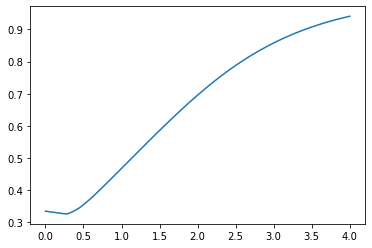

In [266]:
x = np.linspace(0,4,100)
plt.plot(x, mlp_clf.predict_proba(x.reshape(100,1))[:,1])

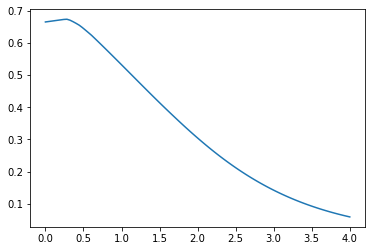

In [267]:
x = np.linspace(0,4,100)
plt.plot(x, mlp_clf.predict_proba(x.reshape(100,1))[:,0])

(array([ 2.,  0.,  1.,  2.,  2.,  0.,  1.,  1.,  1.,  4.,  2.,  1.,  4.,
         4.,  7.,  8.,  6.,  9., 12.,  8.,  6., 17., 11., 45., 59.]),
 array([0.0580463 , 0.08267097, 0.10729564, 0.13192031, 0.15654499,
        0.18116966, 0.20579433, 0.23041901, 0.25504368, 0.27966835,
        0.30429303, 0.3289177 , 0.35354237, 0.37816705, 0.40279172,
        0.42741639, 0.45204107, 0.47666574, 0.50129041, 0.52591508,
        0.55053976, 0.57516443, 0.5997891 , 0.62441378, 0.64903845,
        0.67366312]),
 <BarContainer object of 25 artists>)

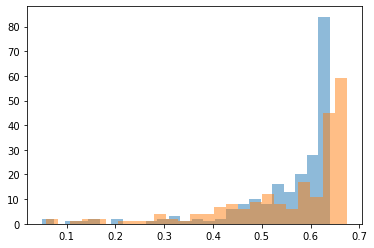

In [268]:
plt.hist(gnb.predict_proba(nX_test[ny_test == 0])[:,0],bins=25, alpha=0.5)
plt.hist(mlp_clf.predict_proba(nX_test[ny_test == 0])[:,0],bins=25, alpha=0.5)